11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 98s 114ms/step - accuracy: 0.8096 - loss: 0.1654 - val_accuracy: 0.8156 - val_loss: 0.0691
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 134s 105ms/step - accuracy: 0.8154 - loss: 0.0681 - val_accuracy: 0.8156 - val_loss: 0.0674
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 143s 106ms/step - accuracy: 0.8155 - loss: 0.0667 - val_accuracy: 0.8156 - val_loss: 0.0667
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 142s 106ms/step - accuracy: 0.8158 - loss: 0.0659 - val_accuracy: 0.8156 - val_loss: 0.0662
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 142s 106ms/step - accuracy: 0.8153 - loss: 0.0657 - val_accuracy: 0.8156 - val_loss: 0.0658
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


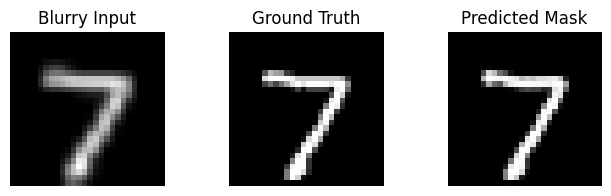

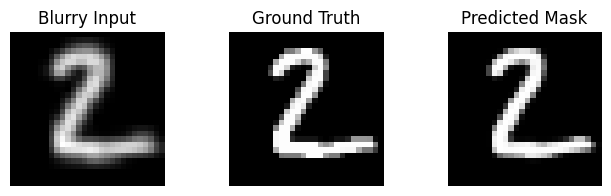

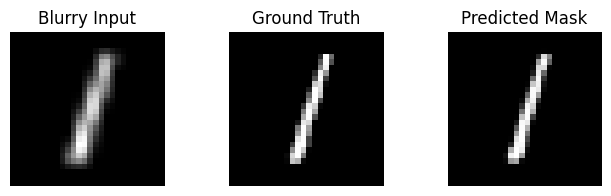

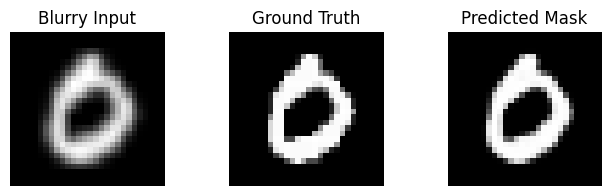

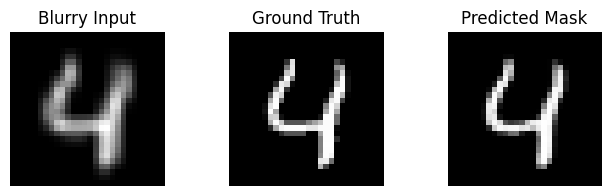

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

# Load and preprocess MNIST
(x_train, _), (x_test, _) = mnist.load_data()
x_train, x_test = x_train[..., None] / 255.0, x_test[..., None] / 255.0

# Simulate blurry inputs
def blur_images(images):
    return tf.image.resize(tf.image.resize(images, (14, 14)), (28, 28))

x_train_blur, x_test_blur = blur_images(x_train), blur_images(x_test)

# Simple U-Net model
def simple_unet(input_shape):
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv2D(32, 3, activation='relu', padding='same')(inputs)
    x = layers.MaxPooling2D()(x)
    x = layers.Conv2D(64, 3, activation='relu', padding='same')(x)
    x = layers.Conv2DTranspose(32, 3, strides=2, padding='same', activation='relu')(x)
    outputs = layers.Conv2D(1, 1, activation='sigmoid')(x)
    return models.Model(inputs, outputs)

# Compile and train
model = simple_unet((28, 28, 1))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train_blur, x_train, epochs=5, batch_size=64, validation_split=0.1)

# Predict on test samples
predicted = model.predict(x_test_blur[:5])

# Visualization
for i in range(5):
    plt.figure(figsize=(8, 2))
    for j, (title, img) in enumerate(zip(
        ["Blurry Input", "Ground Truth", "Predicted Mask"],
        [x_test_blur[i], x_test[i], predicted[i]]
    )):
        plt.subplot(1, 3, j + 1)
        plt.title(title)
        plt.imshow(np.squeeze(img), cmap='gray')
        plt.axis('off')
    plt.show()
